In [8]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Reading the csv file

df = pd.read_excel(r"C:\Users\Lavanya\Downloads\Customer_retention_dataset\Customer_retention_dataset\customer_retention_dataset.xlsx")
df.head()

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

   ... Longer time to get logged in (promotion, sales period)  \
0  ...                                          Amazon.in       
1  ...                            Amazon.in, Flipkart.com       
2  ...                                         Myntra.com       
3  ...                                       Snapdeal.com       
4 

In [10]:
# size of the dataset

df.shape

(269, 71)

The aim of this problem is to effectively analyse the different factors influencing customer retention and activation in          e commerce retail.

The dataset has information regarding these features, it also gives an insight of the recommended websites. 

Multiple variables concerning costumers age, gender, city etc along with the ease of functioning of websites is mentioned in this dataset. Also, the effect of design, navigation, services, offers etc of the site on the user for their shopping needs is present. 

In [11]:
# datatype associated with each column

obj = df.dtypes
for key,value in obj.iteritems():
    print(key,",",value)

1Gender of respondent , object
2 How old are you?  , object
3 Which city do you shop online from? , object
4 What is the Pin Code of where you shop online from? , int64
5 Since How Long You are Shopping Online ? , object
6 How many times you have made an online purchase in the past 1 year? , object
7 How do you access the internet while shopping on-line? , object
8 Which device do you use to access the online shopping? , object
9 What is the screen size of your mobile device?						                                         , object
10 What is the operating system (OS) of your device?				                                           , object
11 What browser do you run on your device to access the website?			                                                           , object
12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                    , object
13 After first visit, how do you reach the online ret

We look at all the column names and the associated datatypes to fameliarize with the data we are handling.

There is no assignment of incorrect datatypes to any of the features.

Looking at the dataframe, we can also conclude that all variables are categorical in nature. (even though 'What is the Pin Code of where you shop online from?' is of int, it is not quantifiable)

Most of the features are nominal with the exception of columns such as 'How old are you?' indicating age group which is ordinal.

In [12]:
# checking the different categories of features and the presence of missing values

df_stats = pd.DataFrame(columns = ['column', 'values', 'num_of_unique_values', 'num_of_unique_values_without_nan', 
                                       'num_miss', 'pct_miss'])

tmp = pd.DataFrame()

for c in df.columns:
    tmp['column'] = [c]
    tmp['values'] = [df[c].unique()]
    tmp['num_of_unique_values'] = len(list(df[c].unique()))
    tmp['num_of_unique_values_without_nan'] = int(df[c].nunique())
    tmp['num_miss'] = df[c].isnull().sum()
    tmp['pct_miss'] = (df[c].isnull().sum()/ len(df)).round(3)*100
    df_stats = df_stats.append(tmp)
    
df_stats

column  \
0                               1Gender of respondent   
0                                 2 How old are you?    
0               3 Which city do you shop online from?   
0   4 What is the Pin Code of where you shop onlin...   
0          5 Since How Long You are Shopping Online ?   
..                                                ...   
0                              Longer delivery period   
0                Change in website/Application design   
0   Frequent disruption when moving from one page ...   
0                   Website is as efficient as before   
0   Which of the Indian online retailer would you ...   

                                               values num_of_unique_values  \
0                                      [Male, Female]                    2   
0   [31-40 years, 21-30 years, 41-50 yaers, Less t...                    5   
0   [Delhi, Greater Noida, Karnal , Bangalore , No...                   11   
0   [110009, 110030, 201308, 132001, 530068, 11001...                   39   
0   [Above 4 years, 3-4 years, 2-3 years, Less tha...                    5   
..                                                ...                  ...   
0   [Paytm.com, Snapdeal.com, Flipkart.com, Amazon...                    6   
0   [Flipkart.com, Amazon.in, Paytm.com, Amazon.in...                    7   
0   [Amazon.in, Myntra.com, Paytm.com, Amazon.in, ...                    8   
0   [Amazon.in, Amazon.in, Flipkart.com, Amazon.in...                    8   
0   [Flipkart.com, Amazon.in, Myntra.com, Amazon.i...                    8   

   num_of_unique_values_without_nan num_miss  pct_miss  
0                                 2        0       0.0  
0                                 5        0       0.0  
0                                11        0       0.0  
0                                39        0       0.0  
0                                 5        0       0.0  
..                              ...      ...       ...  
0                                 6        0       0.0  
0                                 7        0       0.0  
0                                 8        0       0.0  
0                                 8        0       0.0  
0                                 8        0       0.0  

[71 rows x 6 columns]

We can see the different categories in each feature. For example, there are 5 age categories and 11 different cities of the shoppers.
11 different cities span over 39 distinct pincodes.

Although there are five retailers mentioned in this dataframe, there are multiple values in cells which results in increase in the number of classes.
Many users indicate that multiple websites have a particular feature. For example, in longer page displaying time both myntra and snapdeal are mentioned in a single cell.

The num_miss and the pct_miss clearly indicate that the dataset has no missing values.

In [13]:
# The different classes in features and their respective counts

# gender and age group

print(df.iloc[:,0].value_counts())
print('\n')
print(df.iloc[:,1].value_counts())

Female    181
Male       88
Name: 1Gender of respondent, dtype: int64


31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: 2 How old are you? , dtype: int64


Most shoppers are female in age group 21-50 years. It is best to target this criteria in marketing, especially while launching offers and discounts.

In [14]:
# payment methods and abondoned cart

print(df.iloc[:,14].value_counts())
print('\n')
print(df.iloc[:,16].value_counts())

Credit/Debit cards                    148
Cash on delivery (CoD)                 76
E-wallets (Paytm, Freecharge etc.)     45
Name: 15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               , dtype: int64


Better alternative offer        133
Promo code not applicable        54
Change in price                  37
Lack of trust                    31
No preferred mode of payment     14
Name: 17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       , dtype: int64


Credit/debit cards are the convenient payment methods, hence offers on these cards may attract customers. Also, we must be able to accept variety of cards from different companies.

Analysing the previous offers on different sites and then coming up with better discounts is the appropriate counter as most carts are abandoned due to better offers. Providing extensively applicable promo codes helps.

In [15]:
# customer assist and privacy

for i in [26,27,28,37,32]:
    print(df.iloc[:,i].value_counts())
    print('\n')

Strongly agree (5)       194
Agree (4)                 42
Strongly disagree (1)     18
indifferent (3)           15
Name: 27 Empathy (readiness to assist with queries) towards the customers, dtype: int64


Strongly agree (5)    185
Agree (4)              58
indifferent (3)        26
Name: 28 Being able to guarantee the privacy of the customer, dtype: int64


Strongly agree (5)       149
Agree (4)                 94
indifferent (3)           15
Strongly disagree (1)     11
Name: 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.), dtype: int64


Strongly agree (5)       122
Agree (4)                117
Strongly disagree (1)     18
Dis-agree (2)              7
indifferent (3)            5
Name: 38 User satisfaction cannot exist without trust, dtype: int64


Strongly agree (5)    198
Agree (4)              51
Dis-agree (2)          20
Name: 33 Return and replacement policy of the e-tailer is important for purchase decision, dtype: int

The customer support is one of the pillars of e commerce business. The level of care and response is crucial for customer satisfaction. As seen above the contentment of a costumer derives from trust, which intern is assured with impeccable and timely service. 

The return and refund policy has huge effect on consumer attitude, this feature supports the increase trust on retailerwhich is vital for contentment of the user.

The empathy and responsiveness data shows that good customer assist is of at most importance. Also, the privacy of customers is a must.

In [16]:
# monetory benifits 

for i in [36, 40, 46]:
    print(df.iloc[:,i].value_counts())
    print('\n')

Strongly agree (5)    164
Agree (4)              54
indifferent (3)        40
Dis-agree (2)          11
Name: 37 Net Benefit derived from shopping online can lead to users satisfaction, dtype: int64


Strongly agree (5)    148
Agree (4)              75
Disagree (2)           31
indifferent (3)        15
Name: 41 Monetary savings, dtype: int64


Agree (4)             149
Strongly agree (5)     82
indifferent (3)        38
Name: 47 Getting value for money spent, dtype: int64




The above data clearly indicates that concept of 'value for money' is the core of online shopping. Savings along with flexibility is the aim of most online shoppers.

As we all know offers and discounts is the one major attraction for customers. 

In [17]:
# defining a function to deal with multiple values

def expand(df, col, sep=', '):
    r = df[col].str.split(sep)
    d = {c: df[c].values.repeat(r.str.len(), axis=0) for c in df.columns}
    d[col] = [i for sub in r for i in sub]
    return pd.DataFrame(d)

In [18]:
# new dataframe d1 by expanding the last column

d1 = expand(df,'Which of the Indian online retailer would you recommend to a friend?')
print(d1.shape)

(477, 71)


In [19]:
data = d1['Which of the Indian online retailer would you recommend to a friend?'].value_counts()
data

Amazon.in       219
Flipkart.com    127
Myntra.com       76
Paytm.com        44
snapdeal.com     11
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: int64

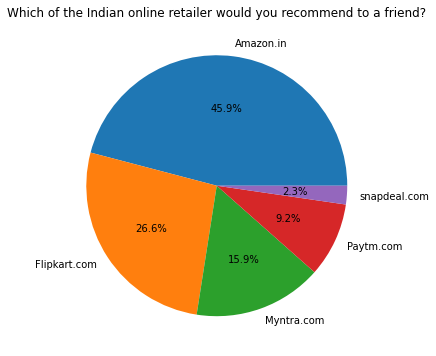

In [20]:
# Looking at the recommended e commerce websites

data = d1['Which of the Indian online retailer would you recommend to a friend?'].value_counts()
plt.figure(figsize=[10,6])
labels = data.keys()
plt.pie(data, autopct="%.1f%%",labels=labels)
plt.title('Which of the Indian online retailer would you recommend to a friend?')
plt.show()

The most consumer recommended online retailer is Amazon, followed by Flipkart and Myntra. Paytm and Snapdeal has fewer customer recommendations.

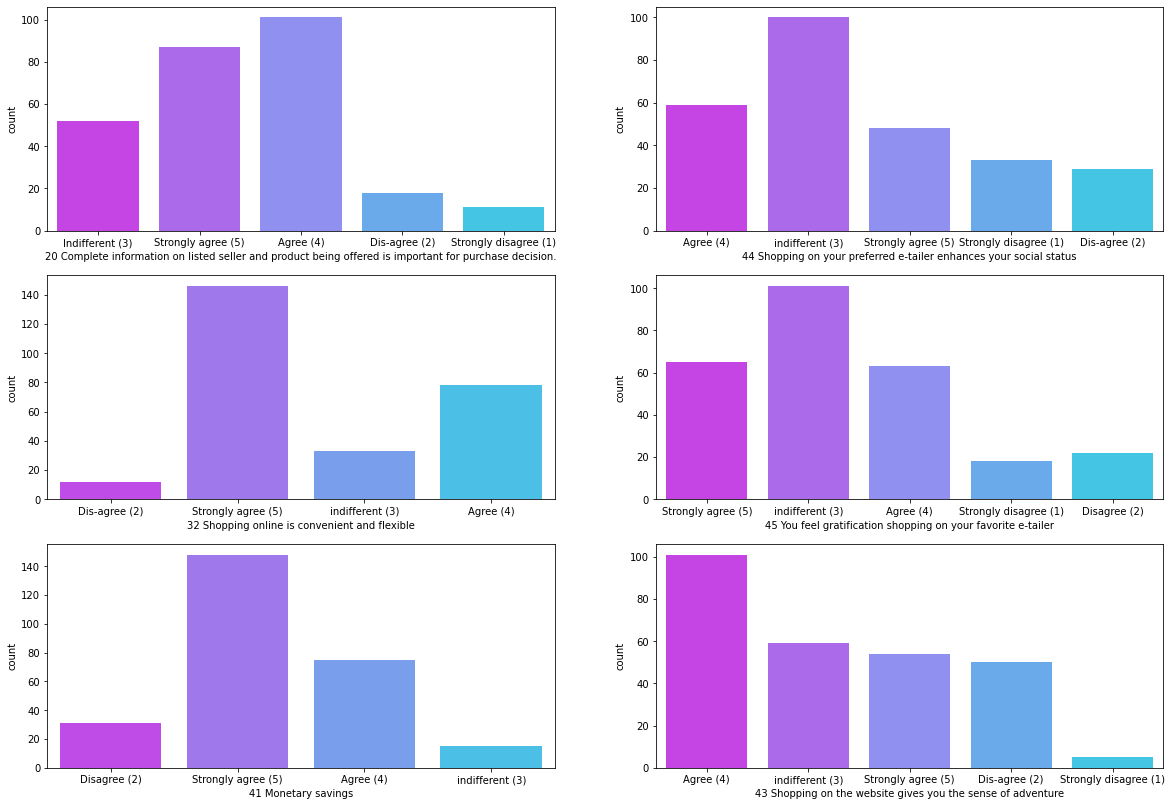

In [21]:
# Looking at the importance of hedonistic and utilitarial value

fig, ax = plt.subplots(3,2,figsize=(20,14))
sns.countplot(df.iloc[:,19],ax = ax[0,0],palette='cool_r')
sns.countplot(df.iloc[:,31],ax = ax[1,0],palette='cool_r')
sns.countplot(df.iloc[:,40],ax = ax[2,0],palette='cool_r')
sns.countplot(df.iloc[:,43],ax = ax[0,1],palette='cool_r')
sns.countplot(df.iloc[:,44],ax = ax[1,1],palette='cool_r')
sns.countplot(df.iloc[:,42],ax = ax[2,1],palette='cool_r')
plt.show()

Utilitarian value:

The factors concerning utilitarian value such as convenience, monetary benifits and information are all perceived to be important by the consumers.

It is very important for customers to be provided with all the information regarding the product, the offers provided by online retailers encourage customers by creating an idea of 'value for money'.

One of the most important factors is the ease of shopping, people can shop variety of products in the comfort of their homes.


Hedonic value:

Coming to the hedonic value, with the countplot we can see that even though the gratification achieved through shopping is not admitted by everyone, it still needs to be considered as almost half the customers agree with it.

Also, we can see from the countplot that shopping online is also considered to be a mark of one's status.The retailer can encourage this thinking by launching special privilages and exotic high end products.

As we all know, shopping does bring a sense of adventure. Searching for the particular product, comparing with other and deciding on the purchase should be made fun and interactive through design of the website to engage customers.  

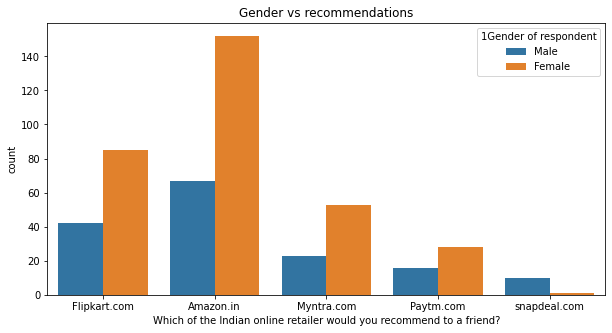

In [28]:
# Grouped barcharts

# Gender vs recommendations

plt.figure(figsize=(10,5))
sns.countplot(d1['Which of the Indian online retailer would you recommend to a friend?'],hue = d1['1Gender of respondent'])
plt.title('Gender vs recommendations')
plt.show()

The preference of both male and female have a same pattern, It goes along the line amazon, flipkart, myntra, paytm and finally snapdeal. The observation here is that all the websites have more female recommendations except snapdeal which seems to be having higher male recommendations however small it may be.

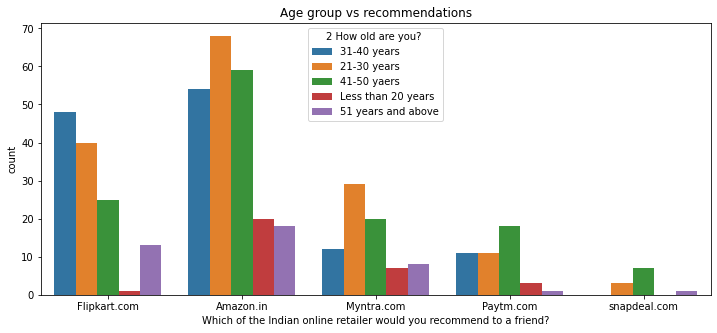

In [30]:
# Age group vs recommendations

plt.figure(figsize=(12,5))
sns.countplot(d1['Which of the Indian online retailer would you recommend to a friend?'],hue = d1['2 How old are you? '])
plt.title('Age group vs recommendations')
plt.show()

The agegroup of 21 to 50 are frequent shoppers. Amazon is the most popular in all age groups. Myntra comes third in popularity for 21 to 30 years, as its products only include fashion.

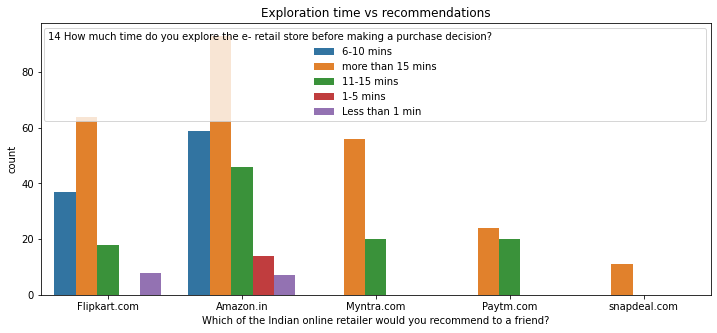

In [35]:
# Online exploration time time with recommendations

plt.figure(figsize=(12,5))
sns.countplot(d1['Which of the Indian online retailer would you recommend to a friend?'],hue = d1['14 How much time do you explore the e- retail store before making a purchase decision?                                                                   '])
plt.title('Exploration time vs recommendations')
plt.show()

Even though amazon has consumers with high exploration time leading to purchase, it is most recommended. Only small number of users buy produces within five minutes. This indicates that providing complete information on product along with alternate options will be useful.

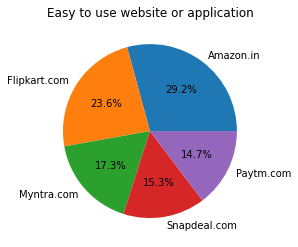

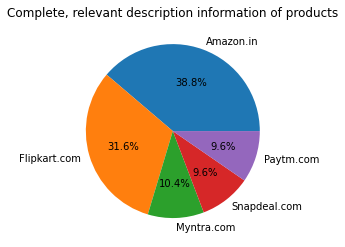

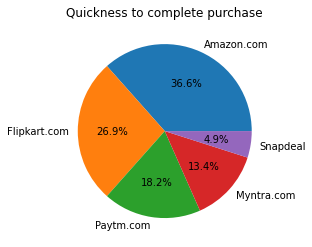

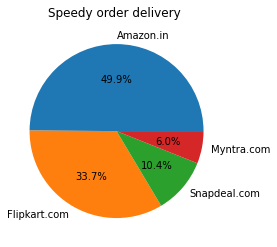

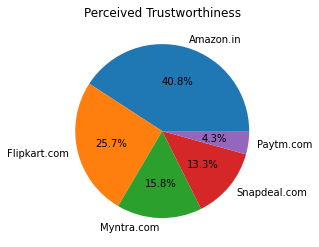

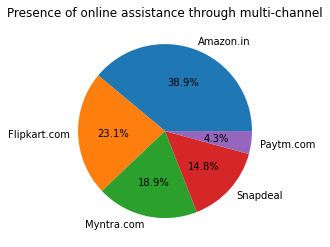

In [22]:
# Here we analyse why amazon is the most recommended retailer 
# We also try to analyse which factors come out to be the strongest in regards to recommendation and retention.

for i in [48,51,54,56,59,60]:
    d = expand(df,df.columns[i])
    data = d.iloc[:,i].value_counts()
    labels = data.keys()
    plt.pie(data, autopct="%.1f%%",labels=labels)
    plt.title(d.columns[i])
    plt.show()

As we can see, customers value the complete information on products. It helps them in deciding on the purchase and also develops trust on the retailer. More than 35 percent people think that amazon provides relevent description on products which contributes to why it is being recommended the most.

There are also factors such as delivery speed, purchase quickness and good web application that support the retailers to gain the top spot. Customer activation can be achieved by offers and discounts, but services along with monetary benefits are of at most importance to carry on customer interest. The above factors along with presence of empathetic online assistence will develop a sense of dependency that is profitable.

Amazon being a worldwide retailer also tops in trustworthiness. We saw from the countplot that trust is one of the main things a customer believes is necessary to shop online, with that being the case it is no surprise that amazon is the most recommended retailer.

From all the graphical analysis, we see the factors that are deemed important by the consumers play a crucial role on the website being recommended. More recommendations is directly proportional to the numbers in customer activation and retention. These factors concern both utilitarin and hedonic value. 

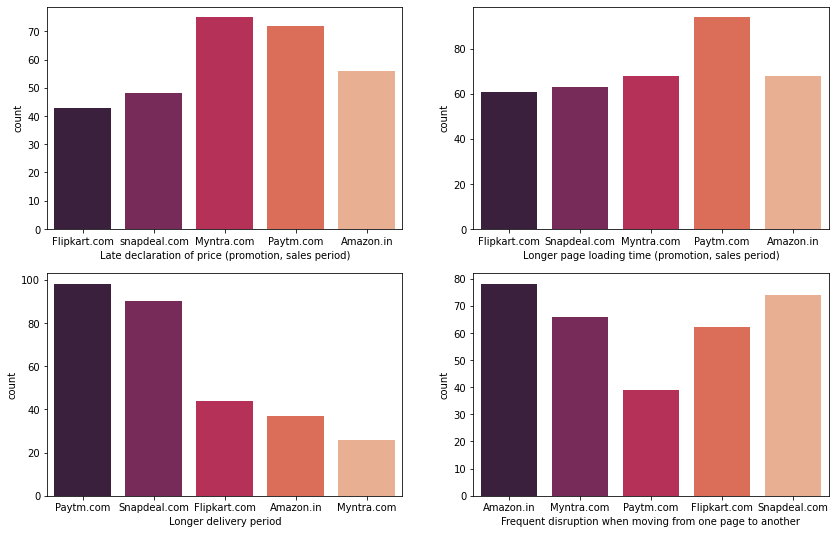

In [41]:
# We will now look at the websites that lag especially during high influx - sales and promotion period

fig, ax = plt.subplots(2,2,figsize=(14,9))
a1 = expand(df,df.columns[63])
sns.countplot(a1.iloc[:,63],ax = ax[0,0],palette='rocket')
a2 = expand(df,df.columns[64])
sns.countplot(a2.iloc[:,64],ax = ax[0,1],palette='rocket')
a3 = expand(df,df.columns[66])
sns.countplot(a3.iloc[:,66],ax = ax[1,0],palette='rocket')
a4 = expand(df,df.columns[68])
sns.countplot(a4.iloc[:,68],ax = ax[1,1],palette='rocket')
plt.show()

As we know longer delivery period, longer page loading time due to low functioning effect the popularity of the retailers in a negative way. Also, disruption when traversing from one page to another is a problem faced by all the websites, especially those with larger customer bracket. 

Paytm and snapdeal can be made examples of this negative effect as they are the least user recommended websites. 

Even though myntra is prone to late declaration in price and amazon lags with more users, these shortcomings are balanced by other positive factors. But, it necessary for these problems to be treated by upgrading the functionality of the website.